In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sympy import Point,Line

In [2]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [3]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')

In [4]:
lines = data.readlines()
len(lines)

7352

In [5]:
lines[1]

'  2.7841883e-001 -1.6410568e-002 -1.2352019e-001 -9.9824528e-001 -9.7530022e-001 -9.6032199e-001 -9.9880719e-001 -9.7491437e-001 -9.5768622e-001 -9.4306751e-001 -5.5785126e-001 -8.1840869e-001  8.4930787e-001  6.8584458e-001  8.2263681e-001 -9.8193011e-001 -9.9999130e-001 -9.9978838e-001 -9.9840537e-001 -9.9915036e-001 -9.7786550e-001 -9.4822478e-001 -7.1489166e-001 -5.0093000e-001 -5.7097906e-001  6.1162716e-001 -3.2954862e-001  2.8421321e-001  2.8459454e-001  1.1570542e-001 -9.0962529e-002  2.9431041e-001 -2.8121057e-001  8.5988430e-002 -2.2152694e-002 -1.6656535e-002 -2.2064350e-001 -1.3428663e-002 -7.2691890e-002  5.7938169e-001  9.6656113e-001 -1.4155127e-001  1.0937881e-001 -9.9741134e-001 -9.8944741e-001 -9.3163868e-001 -9.9788359e-001 -9.8961366e-001 -9.3324040e-001  8.9206031e-001 -1.6134256e-001  1.2258573e-001  9.8452014e-001 -1.1489334e-001  1.0276411e-001 -3.8342955e-001  9.0782890e-001 -9.7058275e-001 -9.7850045e-001 -9.9918838e-001 -9.9002851e-001 -9.4168540e-001 -1.000

In [6]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [7]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [8]:
#pca = PCA(n_components=4)
#pca.fit(z)

In [9]:
#print(pca.explained_variance_ratio_)

In [10]:
#sample = pca.transform(z)
#sample[9]
scale=StandardScaler()
sample=scale.fit_transform(z)
#pca = PCA(n_components=4)
#pca.fit(sample)
#sample = pca.transform(sample)

**Elbow using Root Mean Square Standard Deviation**

In [11]:
RMSSTD={}
K = range(2,11)
for k in K :
    RMSSTD[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample[labels==i])
        #print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        print("Cluster Mean= "+str(cluster_mean))
        
        for index,row in cluster_datapoints.iterrows():
            err = cdist(row[np.newaxis,:],cluster_mean[np.newaxis,:], 'minkowski',p=2)
            RMSSTD[k]=RMSSTD[k]+err
    #Calculate the mean error for entire dataset
    RMSSTD[k]=((RMSSTD[k]/len(sample))[0])[0]
    print("RMSSTD = "+str(RMSSTD))

Cluster Mean= 0     -0.024544
1     -0.070226
2     -0.035133
3      1.021303
4      1.049609
5      0.996162
6      1.014379
7      1.046672
8      0.997436
9      1.021212
10     1.002692
11     0.970037
12    -1.025174
13    -1.008814
14    -0.931405
15     1.052534
16     0.846714
17     0.889077
18     0.789387
19     0.989512
20     1.021403
21     0.985976
22     0.945134
23     0.959564
24     0.896344
25    -0.833093
26     0.676706
27    -0.402241
28     0.304401
29    -0.652531
         ...   
531    0.914591
532    0.613588
533    0.975052
534    0.772495
535    0.961860
536    1.026673
537    0.427511
538    0.217006
539   -0.270780
540   -0.273439
541    0.903174
542    0.872042
543    0.884250
544    0.851714
545    0.735570
546    0.903174
547    0.564799
548    0.895201
549    1.043852
550    0.119532
551   -0.092696
552    0.214999
553    0.183106
554   -0.007570
555   -0.023920
556   -0.007196
557   -0.012467
558   -0.449114
559    0.583419
560    0.500971
Length: 56

Cluster Mean= 0      0.093358
1     -0.027109
2     -0.061834
3      1.463692
4      1.397671
5      1.338440
6      1.465972
7      1.346773
8      1.290826
9      1.454669
10     1.328605
11     1.310557
12    -1.454656
13    -1.518622
14    -1.528974
15     1.436070
16     1.575422
17     1.470235
18     1.324523
19     1.455727
20     1.235199
21     1.169858
22     0.947393
23     1.083628
24     1.072016
25    -0.659986
26     0.570368
27    -0.355639
28     0.315364
29    -0.396069
         ...   
531    1.264271
532    1.365091
533    1.686988
534    1.562064
535    1.601589
536    1.274655
537    0.438839
538    0.828974
539   -0.446623
540   -0.389458
541    1.862121
542    1.811857
543    1.830898
544    1.761641
545    1.575506
546    1.862121
547    1.802161
548    1.816175
549    1.366372
550    0.099099
551    0.143521
552    0.266476
553    0.219257
554   -0.120933
555   -0.009575
556    0.117339
557   -0.083666
558   -0.476370
559    0.585459
560    0.576505
Length: 56

Cluster Mean= 0      0.041662
1     -0.022255
2     -0.103898
3      1.622625
4      1.579324
5      1.863552
6      1.602854
7      1.520472
8      1.765770
9      1.634412
10     1.586931
11     1.750188
12    -1.727810
13    -1.731814
14    -2.254656
15     1.672372
16     1.915780
17     1.826887
18     2.235272
19     1.574849
20     1.441696
21     1.531624
22     0.990223
23     1.057347
24     1.277324
25    -0.582794
26     0.533149
27    -0.174418
28     0.086451
29    -0.276421
         ...   
531    1.691461
532    2.450084
533    2.535723
534    2.775713
535    2.298273
536    1.460127
537    0.396590
538    1.246019
539   -0.634352
540   -0.522560
541    2.975743
542    2.891692
543    2.949521
544    2.751640
545    2.448935
546    2.975743
547    3.782334
548    2.922952
549    1.612994
550    0.041936
551    0.194988
552    0.137615
553    0.033371
554   -0.174353
555   -0.131647
556    0.295469
557   -0.176125
558   -0.479295
559    0.530651
560    0.710242
Length: 56

Cluster Mean= 0      0.109068
1     -0.004222
2     -0.152021
3      1.839762
4      1.690829
5      1.824679
6      1.823835
7      1.662045
8      1.703344
9      1.787084
10     1.812091
11     1.856349
12    -1.942588
13    -1.723533
14    -2.299203
15     1.809226
16     2.340718
17     2.037727
18     2.171919
19     1.808469
20     1.625892
21     1.451253
22     0.985511
23     1.035936
24     1.224735
25    -0.540778
26     0.491761
27    -0.182809
28     0.171659
29    -0.284132
         ...   
531    1.774878
532    2.671222
533    2.702005
534    3.072920
535    2.392457
536    1.480118
537    0.385780
538    1.279106
539   -0.675128
540   -0.558951
541    3.118338
542    2.920382
543    2.981531
544    2.777686
545    2.699814
546    3.118338
547    3.988845
548    2.982794
549    1.629434
550    0.083700
551    0.290879
552    0.091690
553   -0.007359
554   -0.256407
555   -0.074021
556    0.423165
557   -0.177153
558   -0.510051
559    0.517420
560    0.665367
Length: 56

Cluster Mean= 0      0.041603
1      0.025652
2      0.013962
3     -0.863620
4     -0.920227
5     -0.883391
6     -0.857456
7     -0.919804
8     -0.888769
9     -0.856350
10    -0.893721
11    -0.853702
12     0.877958
13     0.857032
14     0.800887
15    -0.921872
16    -0.692853
17    -0.773517
18    -0.689577
19    -0.836044
20    -0.900357
21    -0.885155
22    -1.079172
23    -0.908721
24    -0.866148
25     1.081393
26    -0.729632
27     0.492466
28    -0.156815
29     0.691072
         ...   
531   -0.852249
532   -0.588895
533   -0.852871
534   -0.647166
535   -0.822949
536   -1.009418
537   -0.291869
538   -0.001804
539   -0.069913
540   -0.073642
541   -0.759322
542   -0.739067
543   -0.747264
544   -0.722766
545   -0.614983
546   -0.759322
547   -0.460313
548   -0.752984
549   -0.972032
550   -0.017346
551    0.392490
552   -0.384255
553   -0.313334
554   -0.001143
555    0.007939
556   -0.035005
557    0.024687
558   -0.484632
559    0.201572
560    0.196541
Length: 56

Cluster Mean= 0     -0.557780
1      0.562993
2      0.452734
3     -0.547311
4     -0.264313
5     -0.144097
6     -0.541777
7     -0.227417
8     -0.092264
9     -0.670021
10    -0.136329
11    -0.166203
12     0.403861
13     0.539995
14     0.415716
15    -0.221114
16    -0.564913
17     0.019783
18     0.029225
19    -0.527129
20    -0.157314
21    -0.004545
22     0.296204
23     0.177782
24     0.204194
25    -0.287418
26    -0.148627
27     0.287190
28    -0.816822
29    -0.510240
         ...   
531   -0.191673
532    0.015995
533   -0.462302
534   -0.470751
535   -0.543589
536   -0.168944
537   -0.604215
538   -0.839728
539    1.161432
540    1.129751
541   -0.562305
542   -0.515212
543   -0.539184
544   -0.490528
545   -0.452924
546   -0.562305
547   -0.423569
548   -0.565744
549   -0.305101
550   -0.531202
551   -0.742081
552    0.585694
553    0.515067
554    0.171023
555    0.172689
556   -0.100500
557    0.178591
558    1.045486
559   -0.994557
560   -0.943887
Length: 56

Cluster Mean= 0     -0.135644
1     -0.165284
2     -0.118757
3      0.686504
4      0.783399
5      0.899074
6      0.657912
7      0.810273
8      0.942470
9      0.691504
10     0.756116
11     0.788820
12    -0.688774
13    -0.615695
14    -0.620896
15     0.793231
16     0.324247
17     0.462600
18     0.617397
19     0.588009
20     0.839944
21     1.017690
22     0.947345
23     0.833771
24     0.731002
25    -1.022532
26     0.787674
27    -0.474282
28     0.323809
29    -0.958221
         ...   
531    0.882169
532    0.161209
533    0.559733
534    0.453094
535    0.543665
536    0.826738
537    0.149042
538   -0.523760
539    0.051104
540   -0.028636
541    0.246916
542    0.191223
543    0.233286
544    0.152967
545    0.164504
546    0.246916
547   -0.143427
548    0.296012
549    0.768949
550    0.143494
551   -0.270923
552   -0.058899
553   -0.082199
554    0.088761
555    0.018385
556   -0.142089
557    0.078795
558   -0.378900
559    0.613832
560    0.481267
Length: 56

In [12]:
SSE_array=[]
slope=[]
for key,value in RMSSTD.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+2,s])
slope

[16.434013202895194, 15.744636368702453, 15.282539637344986, 14.999491628133304, 14.705220469760846, 14.60063315850134, 14.440361976857028, 14.278759852413742, 14.182579591647956]


[[3, -0.6893768341927409],
 [4, -0.46209673135746776],
 [5, -0.28304800921168116],
 [6, -0.29427115837245843],
 [7, -0.10458731125950571],
 [8, -0.16027118164431187],
 [9, -0.16160212444328614],
 [10, -0.09618026076578623]]

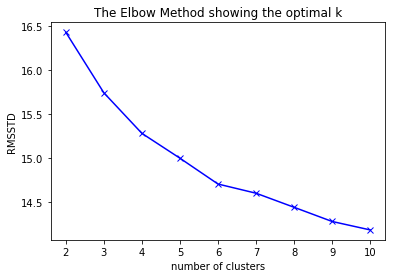

In [13]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('number of clusters')
plt.ylabel('RMSSTD')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
slope

[[3, -0.6893768341927409],
 [4, -0.46209673135746776],
 [5, -0.28304800921168116],
 [6, -0.29427115837245843],
 [7, -0.10458731125950571],
 [8, -0.16027118164431187],
 [9, -0.16160212444328614],
 [10, -0.09618026076578623]]

In [16]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 4
Optimal Number of Clusters = 6
Optimal Number of Clusters = 7


In [14]:
distances=[]
for i in range(0,9):
    p1=Point(2,SSE_array[0])
    p2=Point(10,SSE_array[8])
    l1 = Line(p1,p2)
    p=Point(i+2,SSE_array[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 6
